In [ ]:
# libs

import pandas as pd
import numpy as np

import re
import requests, io
from bs4 import BeautifulSoup
import json
import dpath.util

import time
import tqdm

import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize

%matplotlib inline

In [ ]:
def print_worktime(start):
    
    duration = time.time() - start
    duration = round(duration / 60, 3)
    
    print(f"Код отработал за: {duration} минут")

# Поиск пути к блоку с изображениями

In [ ]:
url = 'https://www.gapminder.org/dollar-street?zoom=6&p=4'
text = requests.get(url)
content = BeautifulSoup(text.text, "html.parser")

In [ ]:
print(content.prettify())

<!DOCTYPE html>
<html>
 <head>
  <script src="/cdn-cgi/apps/head/BA9wG71UcNHRZyqda6gYchEbuNM.js">
  </script>
  <link href="/dollar-street/static/favicons/favicon.ico" rel="icon" type="image/x-icon"/>
  <link href="/dollar-street/static/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/dollar-street/static/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/dollar-street/static/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/dollar-street/static/favicons/site.webmanifest" rel="manifest"/>
  <link color="#ffcc55" href="/dollar-street/static/favicons/safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="#ffcc55" name="msapplication-TileColor"/>
  <meta content="/dollar-street/static/favicons/mstile-144x144.png" name="msapplication-TileImage"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width" name="viewport"/>
  <meta charset="utf-8"/>
  <me

##### Блок с нужной информацией и изображениями находится по тегу **script** с аттрибутом **id="__NEXT_DATA__"**

##### Далее извлекаем данные из блока

In [ ]:
json_data = content.find_all('script',id="__NEXT_DATA__")
json_data = json_data[0].contents[0]
json_data = json.loads(json_data)

In [ ]:
json_data.keys()

dict_keys(['props', 'page', 'query', 'buildId', 'assetPrefix', 'isFallback', 'customServer', 'gip', 'appGip'])

In [ ]:
print(dpath.util.search(json_data, '**/original'))

<ipython-input-21-3d477a9780b5>:1: DeprecationWarning: The dpath.util package is being deprecated. All util functions have been moved to dpath package top level.
  print(dpath.util.search(json_data, '**/original'))


{'props': {'pageProps': {'initialMobxState': {'thingStore': {'mediaRegistry': [{'images': {'original': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30.jpg'}}, {'images': {'original': 'https://media.dollarstreet.org/5ec4f87df0611d7ddd740f47/5ec4f87df0611d7ddd740f47.jpg'}}, {'images': {'original': 'https://media.dollarstreet.org/5ec4f7d3f0611d7ddd740977/5ec4f7d3f0611d7ddd740977.JPG'}}, {'images': {'original': 'https://media.dollarstreet.org/5d4be719cf0b3a0f3f344e46/5d4be719cf0b3a0f3f344e46.jpg'}}, {'images': {'original': 'https://media.dollarstreet.org/5d4be102cf0b3a0f3f33a493/5d4be102cf0b3a0f3f33a493.jpeg'}}, {'images': {'original': 'https://media.dollarstreet.org/5d4be139cf0b3a0f3f33aaf3/5d4be139cf0b3a0f3f33aaf3.jpg'}}, {'images': {'original': 'https://media.dollarstreet.org/5d4bf210cf0b3a0f3f3579ec/5d4bf210cf0b3a0f3f3579ec.jpg'}}, {'images': {'original': 'https://media.dollarstreet.org/62a667b19280e31f48f9d92b/905cc428e0f046d9095b61b030d4b100/62a667b1

**Путь к изображениям**

props &rarr; pageProps &rarr; initialMobxState &rarr; thingStore &rarr; mediaRegistry &rarr; images

In [ ]:
print('Всего изображений на 4 странице:', len(json_data['props']['pageProps']['initialMobxState']['thingStore']['mediaRegistry']))

Всего изображений на 4 странице: 60


In [ ]:
data_page = json_data['props']['pageProps']['initialMobxState']['thingStore']['mediaRegistry']

In [ ]:
data_page[0]

{'id': '5d4bf04ccf0b3a0f3f354b30',
 'images': {'original': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30.jpg',
  'uncropped': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_raw.jpg',
  'cropped80': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_80.jpg',
  'cropped180': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_180.jpg',
  'cropped360': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_360.jpg',
  'cropped640': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_640.jpg',
  'full512': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_512.jpg',
  'full1024': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_1024.jpg',
  'full2048': 'https://media.dollarstreet.org/5d4bf04ccf0b3a0f3f354b30/5d4bf04ccf0b3a0f3f354b30_2048.jpg

# Функция парсера

In [ ]:
def parser(page: int, topic: str, country: str = 'world', media: str = 'photos') -> pd.DataFrame:
    
    url_body = 'https://www.gapminder.org/dollar-street?'
    p = 'p=' + str(page)
    media = 'media=' + media
    topic_url = 'topic=' + topic
    country = 'country=' + country
    url = '&'.join((url_body, topic_url, country, media, p))
    
    text = requests.get(url)
    content = BeautifulSoup(text.text, "html.parser")
    json_data = content.find_all('script',id="__NEXT_DATA__")
    json_data = json_data[0].contents[0]
    json_data = json.loads(json_data)
    data_page = json_data['props']['pageProps']['initialMobxState']['thingStore']['mediaRegistry']
    
    id_code = []
    images = []
    countries = []
    regions = []
    incomes = []
    
    for item in range(len(data_page)):
        images.append(data_page[item]['images']['original'])
        countries.append(data_page[item]['country']['name'])
        regions.append(data_page[item]['region']['name'])
        incomes.append(data_page[item]['sortVal'])
        id_code.append(data_page[item]['id'])
        
    df = pd.DataFrame(columns = ['id', 'image', 'country', 'region', 'income'])
    df['id'] = id_code
    df['image'] = images
    df['country'] = countries
    df['region'] = regions
    df['income'] = incomes
    df['page'] = page
    df['topic'] = topic
    
    return df

In [ ]:
first_page = parser(1, 'families')
first_page.head(2)

id  \
0  5d4bf10dcf0b3a0f3f355e40   
1  5d4be794cf0b3a0f3f345b34   

                                               image        country  region  \
0  https://media.dollarstreet.org/5d4bf10dcf0b3a0...  Cote d'Ivoire  Africa   
1  https://media.dollarstreet.org/5d4be794cf0b3a0...     Bangladesh    Asia   

       income  page     topic  
0   41.767077     1  families  
1  175.000000     1  families

In [ ]:
first_page.shape

(60, 7)

# Парсинг всех страниц и тем

In [ ]:
pages = np.arange(0,11)
topics = ['families', 'adding-spices-to-food-while-cooking', 'alarm-clocks', 'alcoholic-drinks', 'answering-phones', 'arm-watches',
          'armchairs', 'backyards', 'bathroom-door', 'bathrooms', 'bedrooms', 'beds', 'bikes', 'boats', 'books', 'bowls', 'brushing-hair', 'brushing-teeth', 
         'car-keys', 'carrying-water', 'cars', 'ceilings', 'chickens', 'child-rooms', 'chopping-food', 'cleaning-equipment', 'cleaning-floors', 'closing-the-front-door',
          'computers', 'cooking', 'cooking-pots', 'cooking-utensils', 'cups', 'cutlery', 'diapers', 'dinner-guests', 'disability-aid','dish-brushes', 'dish-racks',
         'dish-washing-soaps', 'dishwashers', 'doing-dishes', 'drinking-social-drinks', 'drinking-water', 'drying-clothes', 'drying-dishes', 'earings', 
          'eating', 'everyday-shoes', 'family-snapshots', 'favorite-home-decorations', 'favourite-items-in-kitchen', 'floors', 'freezers', 'front-doors', 
          'frontdoor-keys', 'fruit-trees', 'fruits', 'get-water', 'glasses', 'go-through-mail', 'goats', 'grains', 'guest-beds', 'hair-brushes', 'hallways',
          'hand-washing', 'hands', 'hands-open-to-closed', 'hanging-clothes-to-dry', 'homes', 'house-overviews', 'how-the-most-loved-item-is-used', 'instruments',
          'jackets', 'jewelry', 'kids-bed', 'kids-playing-inside', 'kids-playing-outside', 'kitchen-sinks', 'kitchens', 'latest-furniture-bought', 'light-sources',
          'light-sources-in-livingroom', 'light-sources-kitchen', 'lightsources-by-bed,-reading-light', 'listening-to-radios', 'living-rooms', 'lock-on-front-doors',
          'make-up', 'meat', 'medication', 'menstruation-pads', 'mosquito-protections', 'most-loved-items', 'most-loved-toys', 'motorcycles', 'music-equipment', 
          'music-idols', 'necklaces', 'next-big-things-i-plan-to-buy', 'nicest-shoes', 'opening-and-closing-freezers', 'opening-and-closing-refrigerators', 
          'opening-the-front-door', 'ovens', 'palms', 'papers', 'parking-lots', 'pens', 'pet-foods', 'pets', 'phones', 'places-for-dinner', 
          'places-where-guests-are-served-dinner', 'plates', 'plates-of-food', 'play-areas', 'playing', 'playing-an-instrument', 'playing-with-most-loved-toys', 
          'plugging-into-and-out-of-power-outlet', 'pouring-water','power-outlets', 'power-switches', 'preparing-social-drink', 'putting-on-make-up', 'radios',
          'reading', 'reading-a-book,-seeing-the-back-of-book', 'reading-books,-looking-over-the-shoulder', 'refrigerators', 'roofs', 'rugs', 'salt', 'shampoo',
          'shaving', 'shoes', 'showers', 'sitting-and-watching-tv', 'sitting-areas', 'sleeping', 'smoking', 'soaps', 'social-drinks', 'socializing', 'sofas',
          'sources-of-cool', 'sources-of-heat', 'sources-of-light', 'spices', 'starting-stoves', 'steam-exits', 'storage-rooms', 'stoves', 'street-details',
          'street-view', 'tables-with-food', 'taking-teaspoons-of-salt', 'teeth', 'things-i-dream-of-having', 'throwing-food-trash-away', 'toilet-paper', 
          'toilets', 'tools', 'tooth-paste', 'toothbrushes', 'toothpaste-on-toothbrushes', 'toys', 'trash', 'turn-tv-on', 'turning-fan/ac-on', 'turning-heaters-on', 
          'turning-lights-on-and-off', 'tvs', 'using-most-loved-items', 'using-toilet', 'vegetable-plots', 'vegetables', 'walking-through-homes', 'walking-to-get-water',
          'walking-towards-front-door', 'wall-clocks', 'wall-decorations', 'walls', 'walls-inside', 'wardrobes','washing-clothes', 'washing-detergent',
          'washing-hands', 'waste-dumps', 'water-outlets', 'what-i-wish-i-could-buy', 'wheel-barrows', 'work-areas', 'worship-places', 'worshipping', 'writing', 
          'writing-"home"']

In [ ]:
start = time.time()

df = pd.DataFrame(columns=first_page.columns)

for t,s in zip(topics, tqdm.notebook.tqdm(range(len(topics)-1))):
    for p in pages:
        
        page = parser(page=p, topic=t)
        df = pd.concat([df, page])
        
print_worktime(start)

In [ ]:
# нужно раскомментить, чтобы сохранить дф

df.to_excel('parsered_ds.xlsx')

In [ ]:
print(df.shape)
print(df.describe())
print(df.dtypes)
df.sample(2)

(26336, 7)
             income
count  26336.000000
mean    1309.326768
std     1747.245910
min       26.994581
25%      180.000000
50%      623.000000
75%     1747.000000
max    14753.000000
id          object
image       object
country     object
region      object
income     float64
page        object
topic       object
dtype: object


id  \
6  5d4bdf96cf0b3a0f3f337e3f   
4  5d4beebecf0b3a0f3f351f3c   

                                               image      country  region  \
6  https://media.dollarstreet.org/5d4bdf96cf0b3a0...       Serbia  Europe   
4  https://media.dollarstreet.org/5d4beebecf0b3a0...  Philippines    Asia   

        income page   topic  
6  1193.000000    3  floors  
4    97.639363    2   roofs

In [ ]:
df.topic.value_counts()[:20]

homes                  444
beds                   435
stoves                 429
families               428
floors                 427
toothbrushes           424
front-doors            422
bedrooms               418
everyday-shoes         418
cooking-pots           416
soaps                  411
lock-on-front-doors    410
palms                  410
hands                  409
wardrobes              409
walls-inside           409
ceilings               409
places-for-dinner      402
spices                 401
toilets                400
Name: topic, dtype: int64

In [ ]:
len(df.topic.unique())

85

In [ ]:
len(topics)

88

In [ ]:
for t in topics:
    if t not in df.topic.unique():
        print(t)

adding-spices-to-food-while-cooking
eating
work-areas


# Вывод и сохранение изображений

In [ ]:
path = r'D:\LIT-RE\Gapminder\images\\'

In [ ]:
df['image'].iloc[0]

'https://media.dollarstreet.org/5d4bf437cf0b3a0f3f35b402/5d4bf437cf0b3a0f3f35b402.jpg'

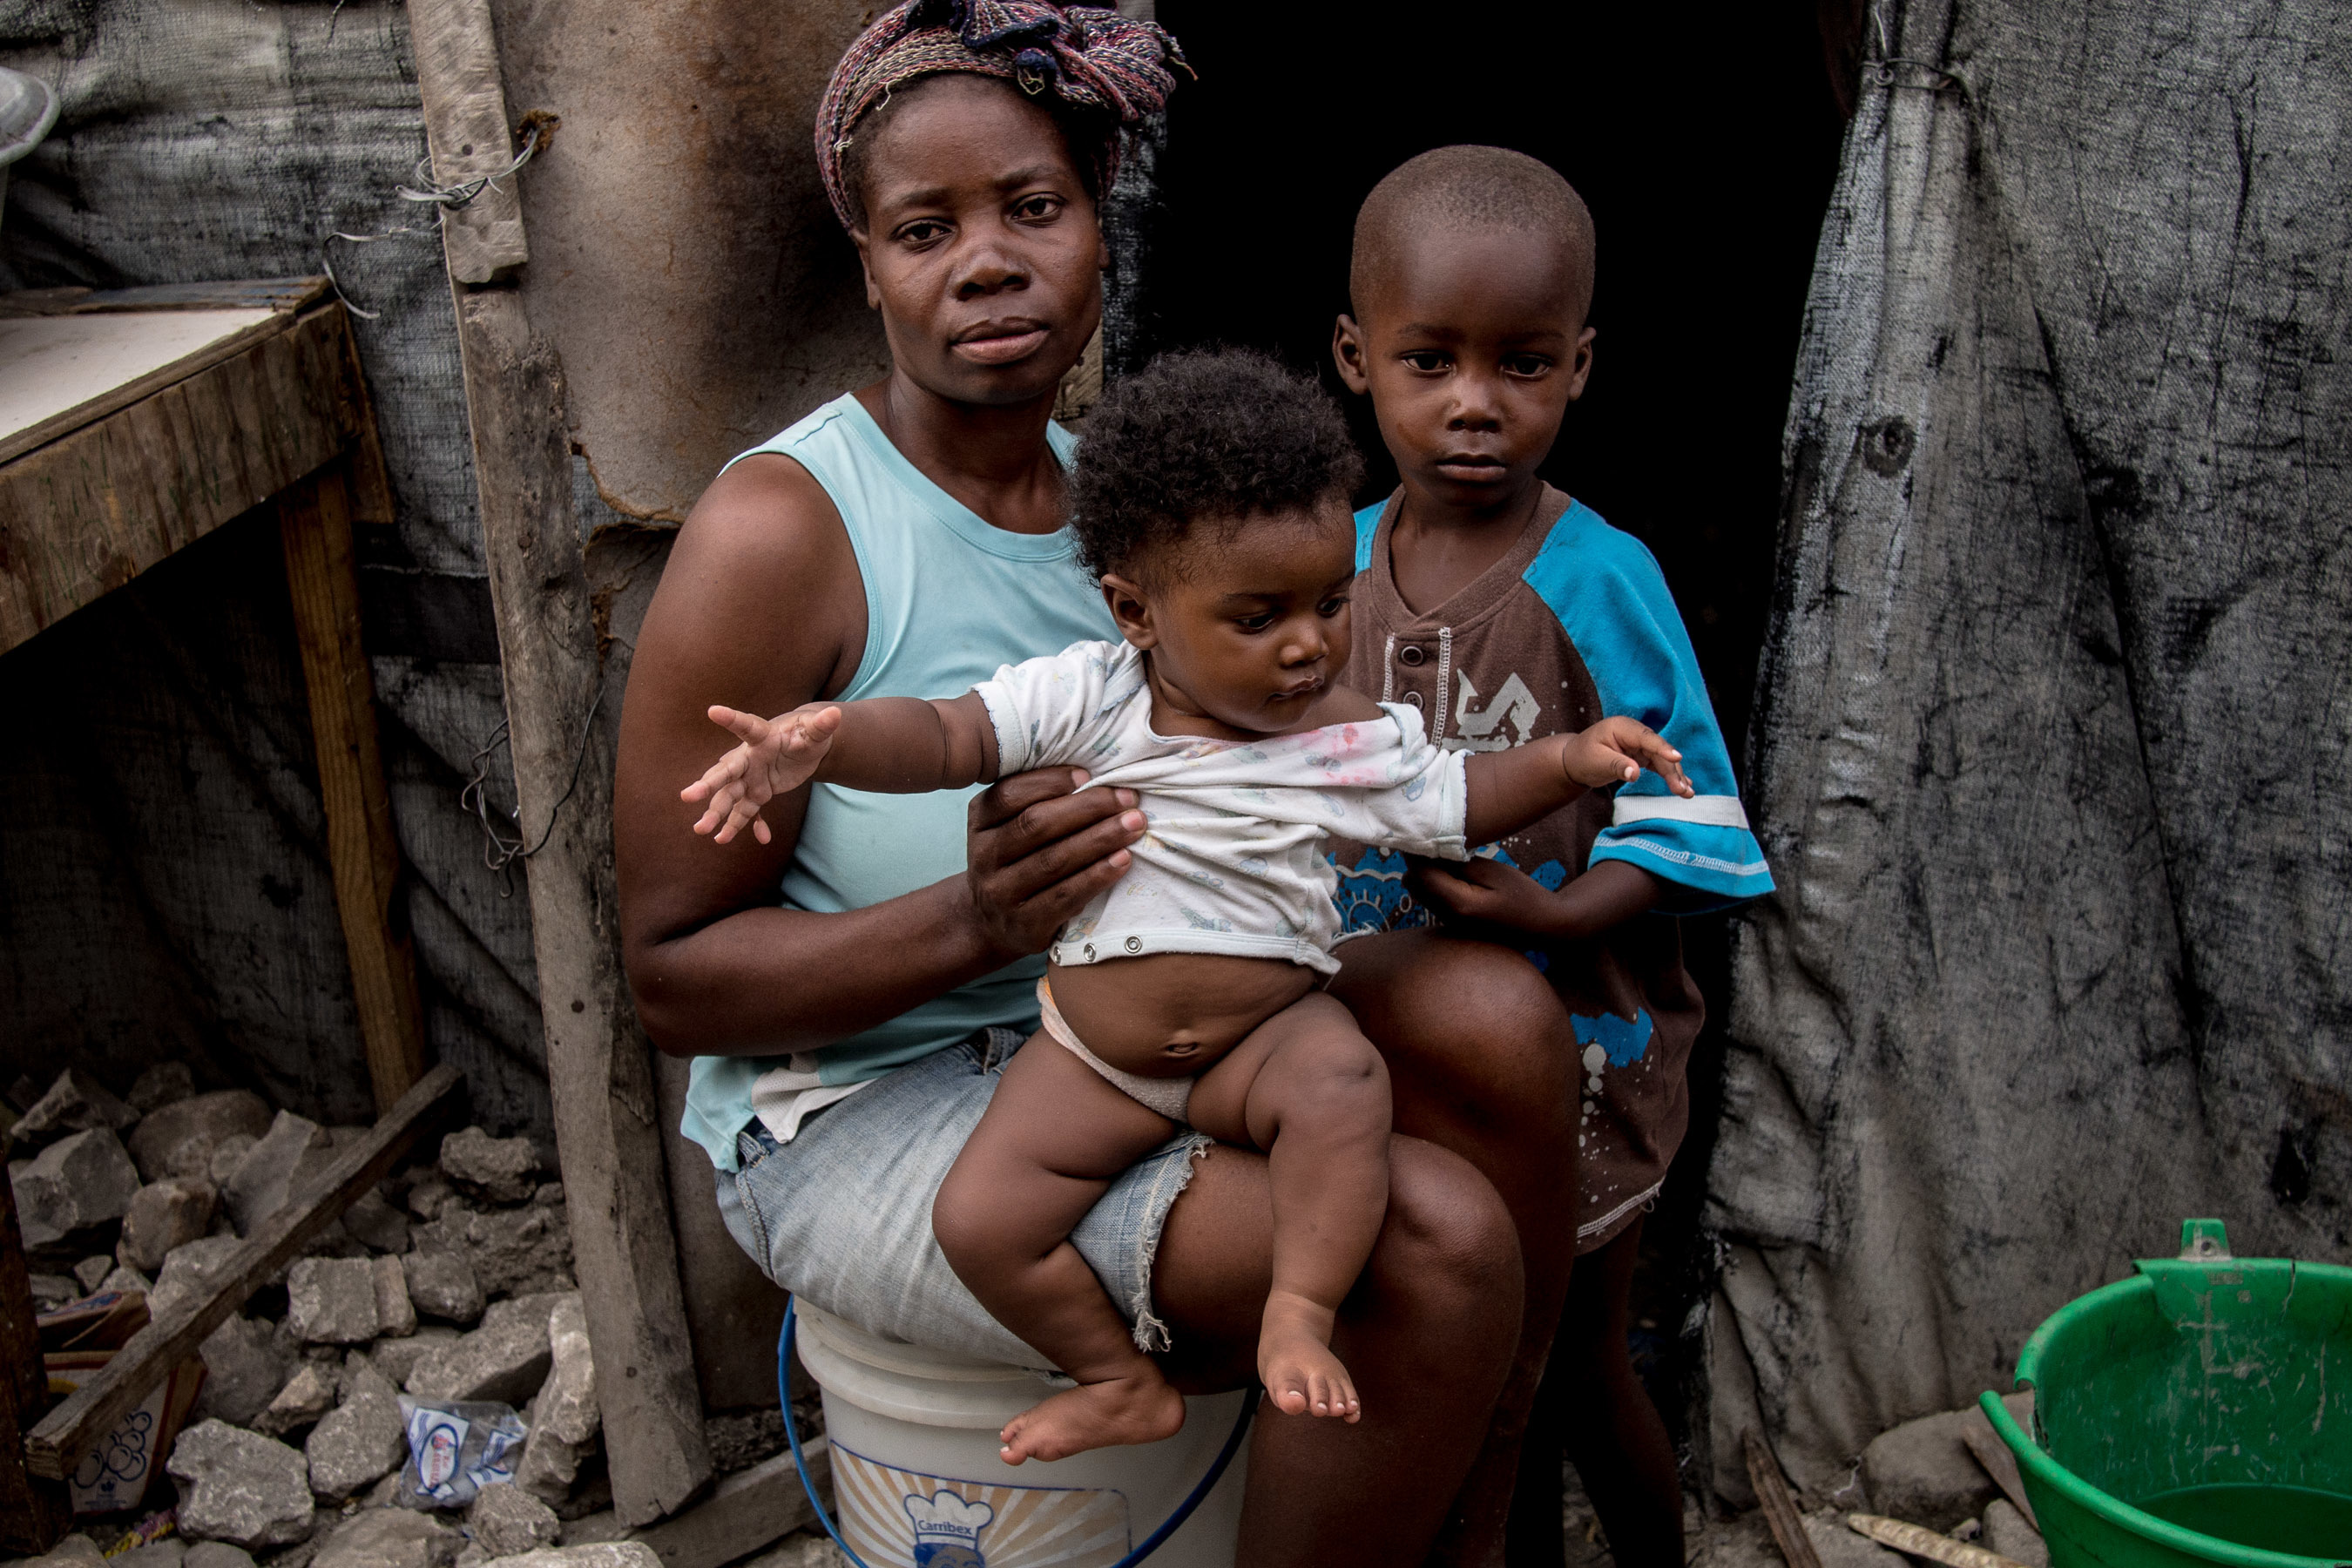

In [ ]:
image = df['image'].iloc[0]
image = requests.get(image).content
image = plt.imread(io.BytesIO(image), format='JPG')
result = Image.fromarray((image).astype(np.uint8))
result

In [ ]:
result.save('images/test_image.jpg')

In [ ]:
def im_loader(df: pd.DataFrame):
    
    for i, s in zip(range(df.shape[0]+1), tqdm.notebook.tqdm(range(df.shape[0]))):
        image = df['image'].iloc[i]
        image = requests.get(image).content
        image = plt.imread(io.BytesIO(image), format='JPG')
        result = Image.fromarray((image).astype(np.uint8))
        result = result.convert('RGB')
        result.save(path + df['id'].iloc[i] + '.jpg')
        

In [ ]:
start = time.time()

im_loader(df)

print_worktime(start)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000021406C41F90>